github: https://github.com/httpswlt/DataMine
data: the winemag-data_first150k of Wine-Review

## Import Modules

In [1]:
# Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import bokeh as bk
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [2]:
%matplotlib inline
# Inline matplotlib (keep charts in this nb)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import & Inspect the Dataset

In [3]:
# A list of the column names to be displayed:
column_names = ["Index", "Country", "Description", "Designation", "Points", "Price", 
             "Province", "Region_1", "Region_2", "Variety", "Winery"]

In [4]:
# Reading the CSV file using the col_names list in the names parameter:
reviews_df = pd.read_csv("./winemag-data_first150k.csv", sep=",", header=1, 
                        names = column_names, index_col=0)

In [5]:
# Dataframe shape
shape = reviews_df.shape
print("The shape of the dataframe (rows, columns):\t {}".format(shape))

The shape of the dataframe (rows, columns):	 (150929, 10)


In [6]:
# Display the first ten records:
reviews_df.head(10)

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Variety,Winery
Index,,,,,,,,,,
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


### Data Types

In [7]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150929 entries, 1 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Country      150924 non-null  object 
 1   Description  150929 non-null  object 
 2   Designation  105194 non-null  object 
 3   Points       150929 non-null  int64  
 4   Price        137234 non-null  float64
 5   Province     150924 non-null  object 
 6   Region_1     125869 non-null  object 
 7   Region_2     60952 non-null   object 
 8   Variety      150929 non-null  object 
 9   Winery       150929 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


In [8]:
# Dislpays the datatypes of the reviews_df DataFrame objectL
reviews_df.dtypes

Country         object
Description     object
Designation     object
Points           int64
Price          float64
Province        object
Region_1        object
Region_2        object
Variety         object
Winery          object
dtype: object

### Handling null values

In [9]:
# Boolean - True if column has null value, False if no null values:
reviews_df.isnull().any()

Country         True
Description    False
Designation     True
Points         False
Price           True
Province        True
Region_1        True
Region_2        True
Variety        False
Winery         False
dtype: bool

The following columns have values where ```.isnull()``` evaluates to ```True```:

- Country
- Designation
- Price
- Province
- Region_1
- Region_2


In [10]:
# The sum of null values per column:
reviews_df.isnull().sum()

Country            5
Description        0
Designation    45735
Points             0
Price          13695
Province           5
Region_1       25060
Region_2       89977
Variety            0
Winery             0
dtype: int64

 #### Country

In [11]:
# Find the null values in the Country column:
reviews_df[reviews_df.Country.isnull()]

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Variety,Winery
Index,,,,,,,,,,
1133,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,NaN,NaN,NaN,Assyrtiko,Tsililis
1440,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Red Blend,Büyülübağ
68226,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
113016,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
135696,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas


In [12]:
# Confirm dataframe shape
reviews_df.shape

(150929, 10)

In [13]:
# Drop the records with null values for "Country", update the reviews_df dataframe:
reviews_df = reviews_df.dropna(how="any", subset=["Country"])

In [14]:
# Confirm null values have been dropped:
reviews_df.shape

(150924, 10)

In [15]:
# Display confirmation of no records with "Country" null values:
reviews_df[reviews_df.Country.isnull()]

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Variety,Winery
Index,,,,,,,,,,


#### Price

In [16]:
reviews_df.isnull().sum()

Country            0
Description        0
Designation    45735
Points             0
Price          13695
Province           0
Region_1       25055
Region_2       89972
Variety            0
Winery             0
dtype: int64

In [17]:
# Calculate the percentage of remaining records if missing prices are dropped:
total_records = len(reviews_df)
missing_prices = reviews_df["Price"].isnull().sum()
missing_ratio = 100 - ((missing_prices / total_records) * 100)
print("Missing prices: {}".format(missing_prices)+ "\n" +
      "Total records: {}".format(total_records) + "\n" + 
      "Percentage remaining: {:.2f}%".format(missing_ratio))

Missing prices: 13695
Total records: 150924
Percentage remaining: 90.93%


In [18]:
# Confirm dataframe shape
reviews_df.shape

(150924, 10)

In [19]:
# Drop the records with null values for "Price", update the reviews_df dataframe:
reviews_df = reviews_df.dropna(how="any", subset=["Price"])

In [20]:
# Confirm the null values have been dropped
reviews_df.shape

(137229, 10)

In [21]:
# Display confirmation of no records with "Price" null values:
reviews_df[reviews_df.Price.isnull()]

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Variety,Winery
Index,,,,,,,,,,


Finally, we can calculate the percentage of rows with zero null values compared to the entire dataset.

The rows with 100% of the columns completed might be useful to split for a training dataset in a later project.

In [22]:
# How many rows have zero null values in any column?
complete = reviews_df[reviews_df.isnull().any(axis=1)].shape
print("Records without null values:\n(rows, columns)\t {}".format(complete))

Records without null values:
(rows, columns)	 (97989, 10)


In [23]:
# Calculate the percentage of fully complete rows in the dataset:
complete_rows = int(complete[0])
total_rows = len(reviews_df)

# Calulations
completion_ratio = ((complete_rows / total_rows) * 100)

print("Total complete records: \t\t{}".format(complete_rows) +
      "\nTotal records: \t\t\t\t{}".format(total_rows) +
      "\nCompletion ratio: \t\t\t{:.2f}%".format(completion_ratio))

Total complete records: 		97989
Total records: 				137229
Completion ratio: 			71.41%


# Analyze the DataFrame

### Drill Down

In [24]:
# Country
reviews_df["Country"].describe()

count     137229
unique        46
top           US
freq       62138
Name: Country, dtype: object

In [25]:
# Designation
reviews_df["Designation"].describe()

count       94918
unique      28343
top       Reserve
freq         2704
Name: Designation, dtype: object

In [26]:
# Points
reviews_df["Points"].describe()

count    137229.000000
mean         87.787975
std           3.221507
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: Points, dtype: float64

In [27]:
# Price
reviews_df["Price"].describe()

count    137229.000000
mean         33.130548
std          36.319116
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: Price, dtype: float64

In [28]:
reviews_df["Province"].describe()

count         137229
unique           446
top       California
freq           44355
Name: Province, dtype: object

In [29]:
reviews_df["Region_1"].describe()

count          114392
unique           1197
top       Napa Valley
freq             6190
Name: Region_1, dtype: object

In [30]:
reviews_df["Region_2"].describe()

count             60703
unique               18
top       Central Coast
freq              12987
Name: Region_2, dtype: object

In [31]:
reviews_df["Variety"].describe()

count         137229
unique           619
top       Chardonnay
freq           13775
Name: Variety, dtype: object

In [32]:
reviews_df["Winery"].describe()

count              137229
unique              13851
top       Williams Selyem
freq                  371
Name: Winery, dtype: object

In [33]:
# Standard Deviation of the DataFrame
reviews_df.std()

Points     3.221507
Price     36.319116
dtype: float64

#### Country

In [34]:
# Total amount of Countries featured in the reviews:
total_countries = reviews_df["Country"].unique()
print("Number of Countries reviewed: {}".format(len(total_countries)))

Number of Countries reviewed: 46


We can examine the distinct countries in the reviews by using the ```.unique()``` method.

In [35]:
# The unique countries in the reviews:
unique_countries = reviews_df["Country"].unique()
print("Total amount of unique countries: {}".format(len(unique_countries)))
print(unique_countries)

Total amount of unique countries: 46
['Spain' 'US' 'France' 'Italy' 'New Zealand' 'Bulgaria' 'Argentina'
 'Australia' 'Portugal' 'Israel' 'South Africa' 'Greece' 'Chile' 'Morocco'
 'Romania' 'Germany' 'Canada' 'Moldova' 'Hungary' 'Austria' 'Croatia'
 'Slovenia' 'India' 'Turkey' 'Macedonia' 'Lebanon' 'Serbia' 'Uruguay'
 'Switzerland' 'Albania' 'Bosnia and Herzegovina' 'Brazil' 'Cyprus'
 'Lithuania' 'Japan' 'China' 'South Korea' 'Ukraine' 'England' 'Mexico'
 'Georgia' 'Montenegro' 'Luxembourg' 'Slovakia' 'Czech Republic'
 'US-France']


In [36]:
# Total wine reviews per country (Top 25)
review_totals_by_country = reviews_df["Country"].value_counts().head(25)
print("Total amount of Reviews submitted for each country: \n")
print(review_totals_by_country)

Total amount of Reviews submitted for each country: 

US              62138
Italy           18784
France          14785
Spain            8160
Chile            5766
Argentina        5587
Australia        4894
Portugal         4176
New Zealand      3070
Austria          2483
Germany          2347
South Africa     2237
Greece            872
Israel            610
Hungary           230
Canada            194
Romania           139
Uruguay            85
Croatia            83
Slovenia           81
Bulgaria           77
Moldova            71
Mexico             63
Turkey             50
Georgia            43
Name: Country, dtype: int64


In [37]:
# Group country by the most common Variety reviewed (first ten).
reviews_df.groupby("Country").Variety.max().head(10)

Country
Albania                       Kallmet
Argentina                 White Blend
Australia                   Zinfandel
Austria                      Zweigelt
Bosnia and Herzegovina         Vranec
Brazil                         Tannat
Bulgaria                  White Blend
Canada                    White Blend
Chile                     White Blend
China                     White Blend
Name: Variety, dtype: object

### Aggregate Functions

In [38]:
# Group points per country - count, min, max points:
reviews_df.groupby(['Country']).Points.agg([len, min, max])

,len,min,max
Country,,,
Albania,2,88,88
Argentina,5587,80,97
Australia,4894,80,100
Austria,2483,81,98
Bosnia and Herzegovina,4,83,88
Brazil,25,81,88
Bulgaria,77,80,90
Canada,194,82,93
Chile,5766,80,95


### Custom Grouping

In [39]:
# Sum Reviews per Country + Region
reviews_df.Country + " - " + reviews_df.Region_1

Index
1                      Spain - Toro
2               US - Knights Valley
3            US - Willamette Valley
4                   France - Bandol
5                      Spain - Toro
                    ...            
150925    Italy - Fiano di Avellino
150926           France - Champagne
150927    Italy - Fiano di Avellino
150928           France - Champagne
150929           Italy - Alto Adige
Length: 137229, dtype: object

#### Pricing

In [40]:
# The most expensive wine
max_price = reviews_df['Price'].max()
print("The most expensive wine in all the reviews cost ${:.2f}".format(max_price))

The most expensive wine in all the reviews cost $2300.00


In [41]:
# reviews_df.groupby("Variety").Price.max()
reviews_df[reviews_df['Price'] == 2300]

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Variety,Winery
Index,,,,,,,,,,
34920,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour


In [42]:
# The average wine cost
avg_price = reviews_df['Price'].mean()
print("The average bottle in the reviews cost ${:.2f} USD".format(avg_price))

The average bottle in the reviews cost $33.13 USD


In [43]:
# The cheapest wine cost
min_price = reviews_df['Price'].min()
print("The cheapest bottle in the reviews cost ${:.2f} USD".format(min_price))

The cheapest bottle in the reviews cost $4.00 USD


In [44]:
# The cheapest wines
reviews_df[reviews_df['Price'] == 4.0]

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Variety,Winery
Index,,,,,,,,,,
1858,US,"Sweet and fruity, this canned wine feels soft ...",Unoaked,83,4.0,California,California,California Other,Chardonnay,Pam's Cuties
25645,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,Merlot,Bandit
34415,Spain,This opens with standard cherry and berry arom...,NaN,84,4.0,Levante,Yecla,NaN,Cabernet Sauvignon,Terrenal
34682,Spain,"Nice on the nose, this has a leafy note and a ...",Estate Bottled,84,4.0,Levante,Yecla,NaN,Tempranillo,Terrenal
36716,Argentina,"Crimson in color but also translucent, with a ...",Red,84,4.0,Mendoza Province,Mendoza,NaN,Malbec-Syrah,Broke Ass
48655,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,Merlot,Bandit
73417,Romania,Notes of sun-dried hay and green flower highli...,UnWineD,86,4.0,Viile Timisului,NaN,NaN,Pinot Grigio,Cramele Recas
80185,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,Merlot,Bandit
90546,Argentina,Clean as anyone should reasonably expect given...,NaN,85,4.0,Mendoza Province,Mendoza,NaN,Malbec,Toca Diamonte


### Points

In [45]:
reviews_df.Points.describe()

count    137229.000000
mean         87.787975
std           3.221507
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: Points, dtype: float64

### Variety

In [46]:
# Sum of reviews per variety (Top 25)
reviews_df["Variety"].value_counts().head(25)

Chardonnay                       13775
Pinot Noir                       13625
Cabernet Sauvignon               12670
Red Blend                         9377
Sauvignon Blanc                   6054
Syrah                             5667
Riesling                          5212
Merlot                            4987
Bordeaux-style Red Blend          4545
Zinfandel                         3794
Malbec                            3085
Sangiovese                        2879
White Blend                       2554
Tempranillo                       2525
Rosé                              2461
Shiraz                            1945
Sparkling Blend                   1820
Portuguese Red                    1812
Nebbiolo                          1529
Rhône-style Red Blend             1455
Cabernet Franc                    1310
Corvina, Rondinella, Molinara     1292
Pinot Gris                        1275
Pinot Grigio                      1270
Viognier                          1255
Name: Variety, dtype: int

In [47]:
# Number of unique wine varieties in the reviews:
unique_wines = reviews_df["Variety"].unique()
print("Unique wine varieties in the reviews: \n{}".format(len(unique_wines)))

Unique wine varieties in the reviews: 
619


In [48]:
reviews_df["Variety"].value_counts().head(3)

Chardonnay            13775
Pinot Noir            13625
Cabernet Sauvignon    12670
Name: Variety, dtype: int64

### Search Wines by a specific Country

In [49]:
# Get wine from Argentina~!
# Here are the Top Ten Wines sorted by points~!
argentina_top_ten = reviews_df[reviews_df['Country'].str.match('Argentina')]
argentina_top_ten.sort_values("Points", ascending=False).head(10)

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Variety,Winery
Index,,,,,,,,,,
116691,Argentina,"If the color doesn't tell the full story, the ...",Nicasia Vineyard,97,120.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Catena Zapata
121311,Argentina,"If the color doesn't tell the full story, the ...",Nicasia Vineyard,97,120.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Catena Zapata
65331,Argentina,"If the color doesn't tell the full story, the ...",Nicasia Vineyard,97,120.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Catena Zapata
107804,Argentina,This blend from the Nicasia and Adrianna viney...,Argentino,96,123.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Catena Zapata
63766,Argentina,"Features intoxicating pastry, blueberry, cola ...",Nicasia Vineyard,96,123.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Catena Zapata
107806,Argentina,"Features intoxicating pastry, blueberry, cola ...",Nicasia Vineyard,96,123.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Catena Zapata
63764,Argentina,This blend from the Nicasia and Adrianna viney...,Argentino,96,123.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Catena Zapata
83001,Argentina,This wine takes you on a trip to an outer wine...,Gran Corte Las Divas Vineyard,96,50.0,Mendoza Province,Tupungato,NaN,Bordeaux-style Red Blend,Riglos
130756,Argentina,"Features intoxicating pastry, blueberry, cola ...",Nicasia Vineyard,96,123.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Catena Zapata


### Perfect Scores

In [50]:
# Create a new dataframe for the perfect scores records:
perfect_scores_df = reviews_df[reviews_df['Points'] == 100]
perfect_scores_df

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Variety,Winery
Index,,,,,,,,,,
2145,France,"Full of ripe fruit, opulent and concentrated, ...",NaN,100,848.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style White Blend,Château Haut-Brion
19354,US,"In a stunning lineup of Cayuse Syrahs, the En ...",En Chamberlin Vineyard,100,65.0,Oregon,Walla Walla Valley (OR),Oregon Other,Syrah,Cayuse
19355,Australia,Not a Cellar Selection in the traditional sens...,Rare,100,300.0,Victoria,Rutherglen,NaN,Muscat,Chambers Rosewood Vineyards
24151,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,NaN,Merlot,Tenuta dell'Ornellaia
26296,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
28954,Italy,"This small, family-run estate in the heart of ...",Guado de' Gemoli,100,195.0,Tuscany,Bolgheri Superiore,NaN,Red Blend,Giovanni Chiappini
41521,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,NaN,Merlot,Tenuta dell'Ornellaia
51886,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
78004,Italy,"This small, family-run estate in the heart of ...",Guado de' Gemoli,100,195.0,Tuscany,Bolgheri Superiore,NaN,Red Blend,Giovanni Chiappini


In [51]:
# How many records have a score of 100?
perfect_scores_df.shape

(24, 10)

In [52]:
# Count how many perfect scores per country:
perfect_scores_df["Country"].value_counts()

US           10
Italy         7
France        4
Australia     3
Name: Country, dtype: int64

In [53]:
# Analyze the range in price for perfect score wines by country:
perfect_scores_df.groupby(['Country']).Price.agg([len, min, max])

,len,min,max
Country,,,
Australia,3.0,300.0,300.0
France,4.0,848.0,1400.0
Italy,7.0,195.0,460.0
US,10.0,65.0,245.0


# Visualizations

### Styling

In [54]:
%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")
# sns.set_palette("Reds")
# sns.set_context("poster", font_scale=1.0)

Wall time: 16 ms


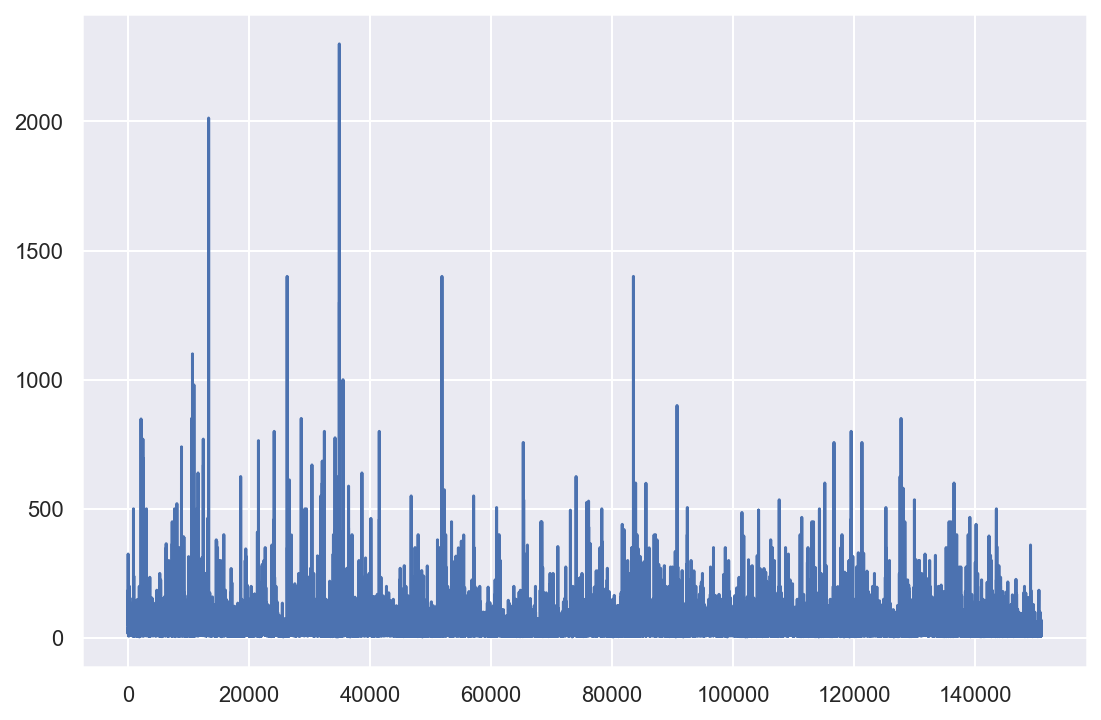

In [55]:
%%time
# Matplotlib to show random order by price
plt.plot(reviews_df.index, reviews_df["Price"])

### Province Totals

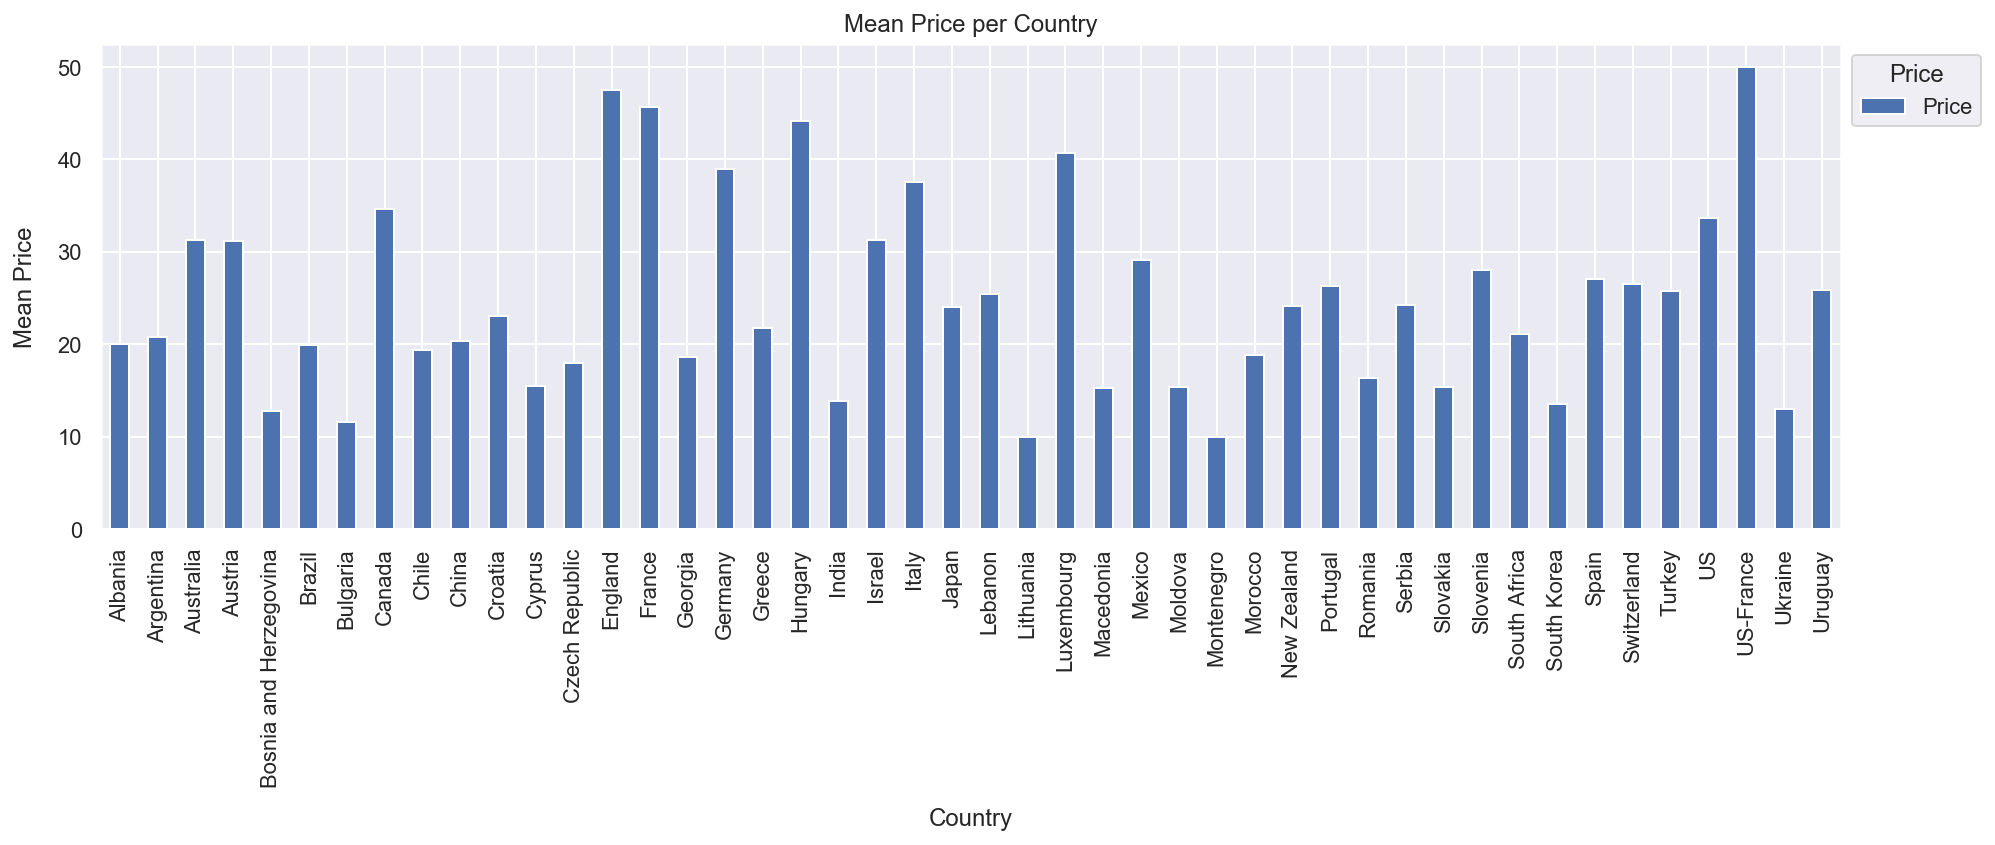

In [56]:
fig, ax = plt.subplots(figsize=(14, 6))

reviews_df.groupby(reviews_df['Country'])['Price'].mean().plot.bar()
mean_price = reviews_df["Price"].mean(0)
reviews_df["Price"].fillna(mean_price)

# Creates labels
ax.set_xlabel('Country')
ax.set_ylabel('Mean Price')
# Sets the plot title
ax.set_title("Mean Price per Country")
ax.legend(bbox_to_anchor=(1, 1), loc=2, title='Price')

fig.tight_layout()

Wall time: 61.8 ms


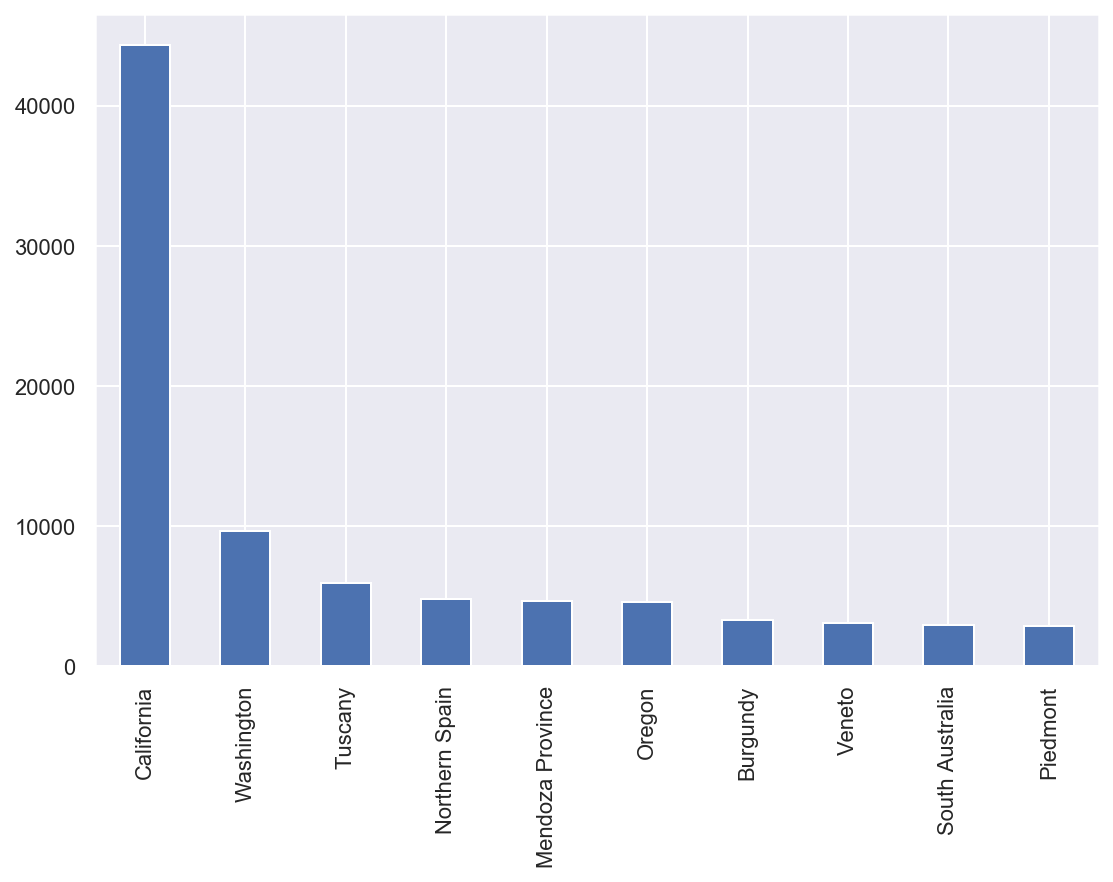

In [57]:
%%time
reviews_df['Province'].value_counts().head(10).plot.bar()

### California

In [58]:
#
top_province = reviews_df['Province'].value_counts().head(1)
print("The province with the most reviews is {}".format(top_province))

The province with the most reviews is California    44355
Name: Province, dtype: int64


Wall time: 27.9 ms


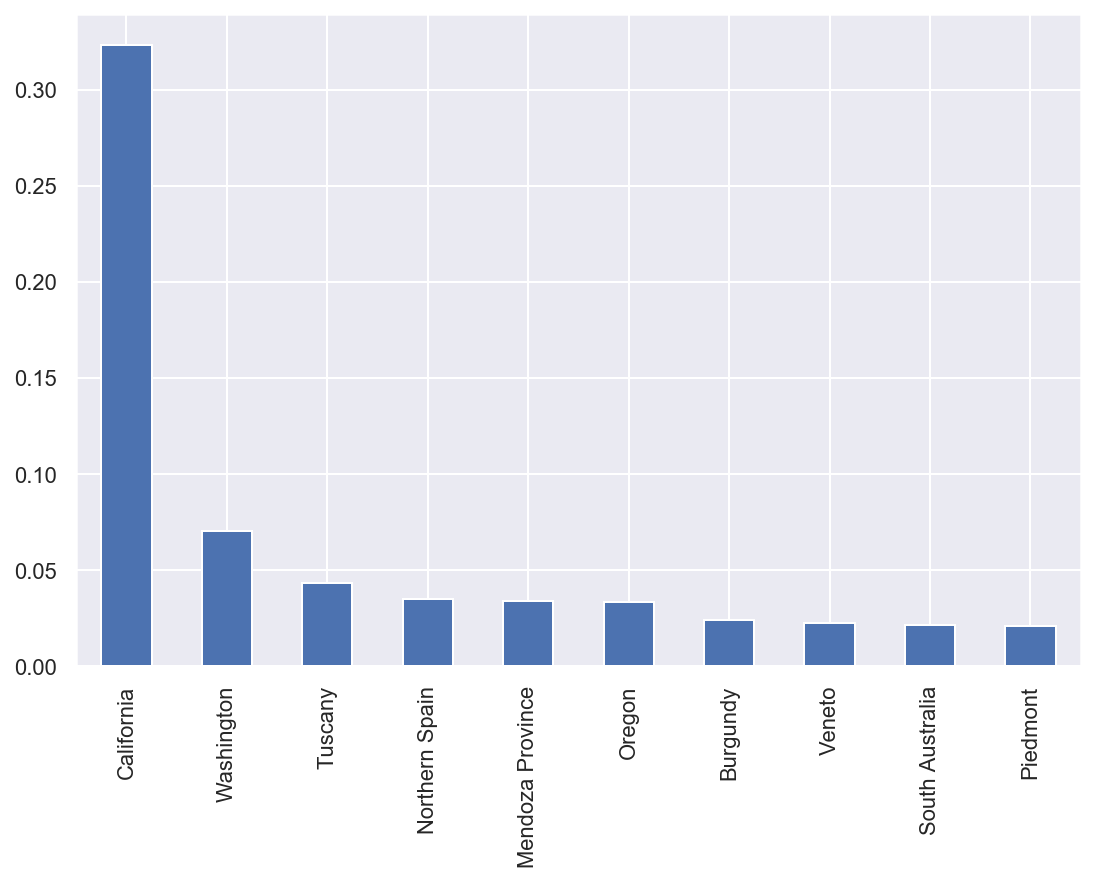

In [59]:
%%time
# Bar plot - Percentage of reviews per top ten provinces
(reviews_df['Province'].value_counts().head(10) / len(reviews_df)).plot.bar()

### Plotting Points

Wall time: 29 ms


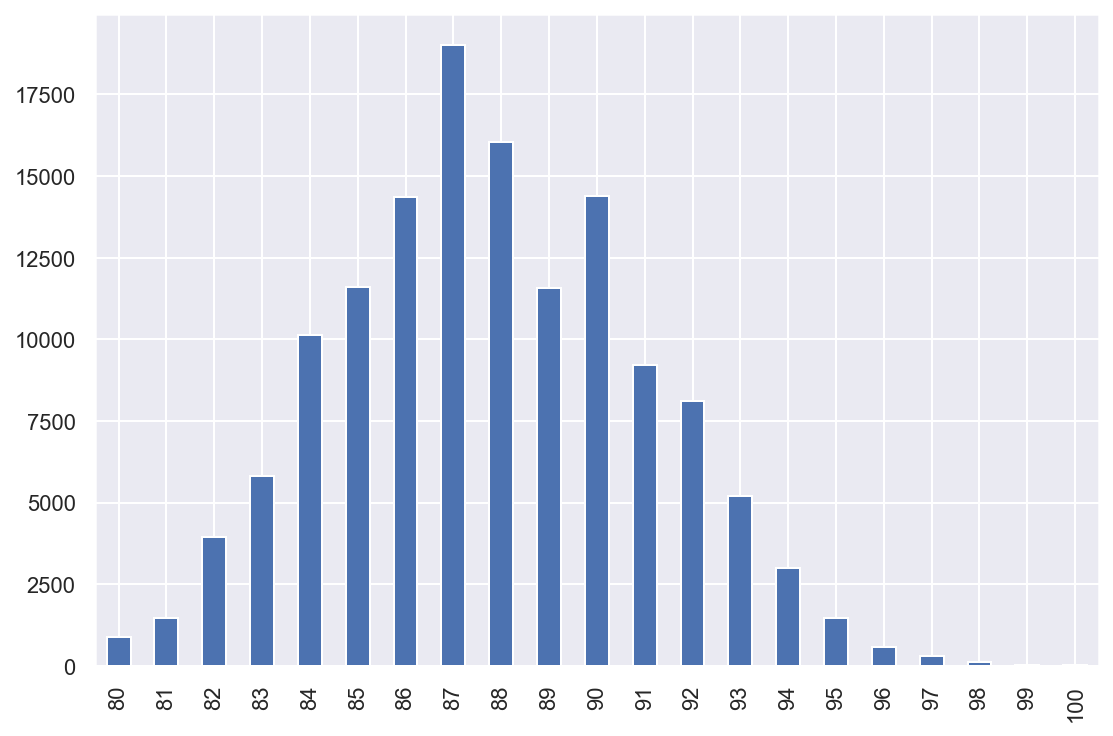

In [60]:
%%time
# Bar plot - points/reviews
reviews_df['Points'].value_counts().sort_index().plot.bar()

Wall time: 18 ms


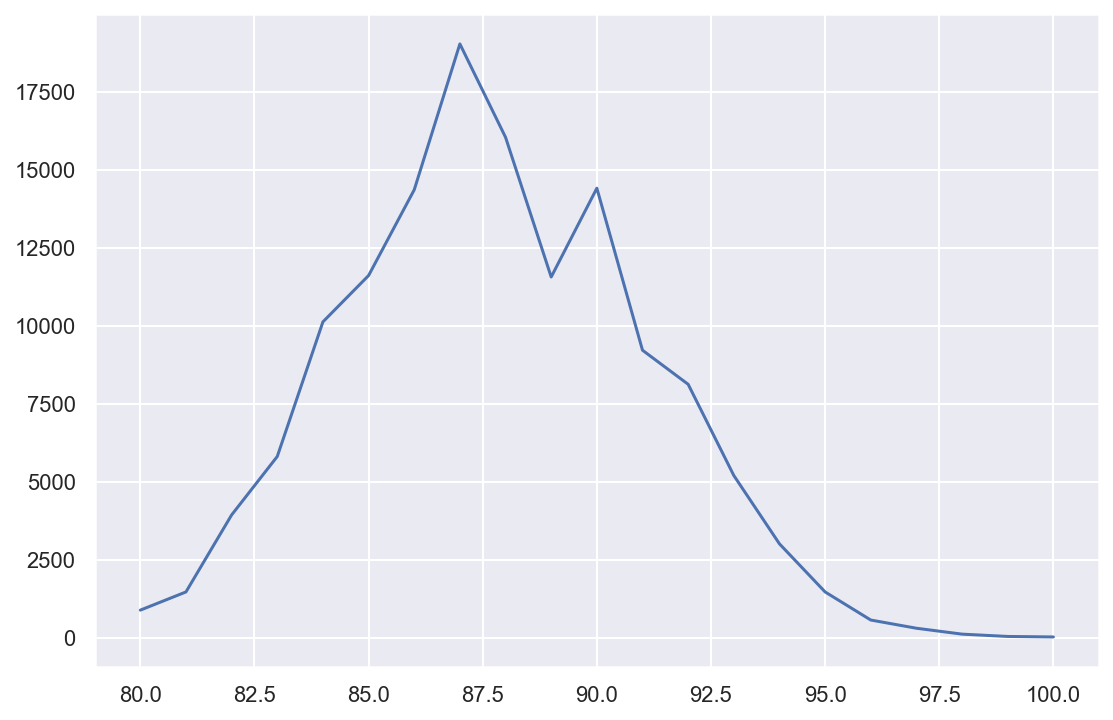

In [61]:
%%time
# Line plot of points/reviews
reviews_df['Points'].value_counts().sort_index().plot.line()

# Seaborn

Wall time: 39.9 ms


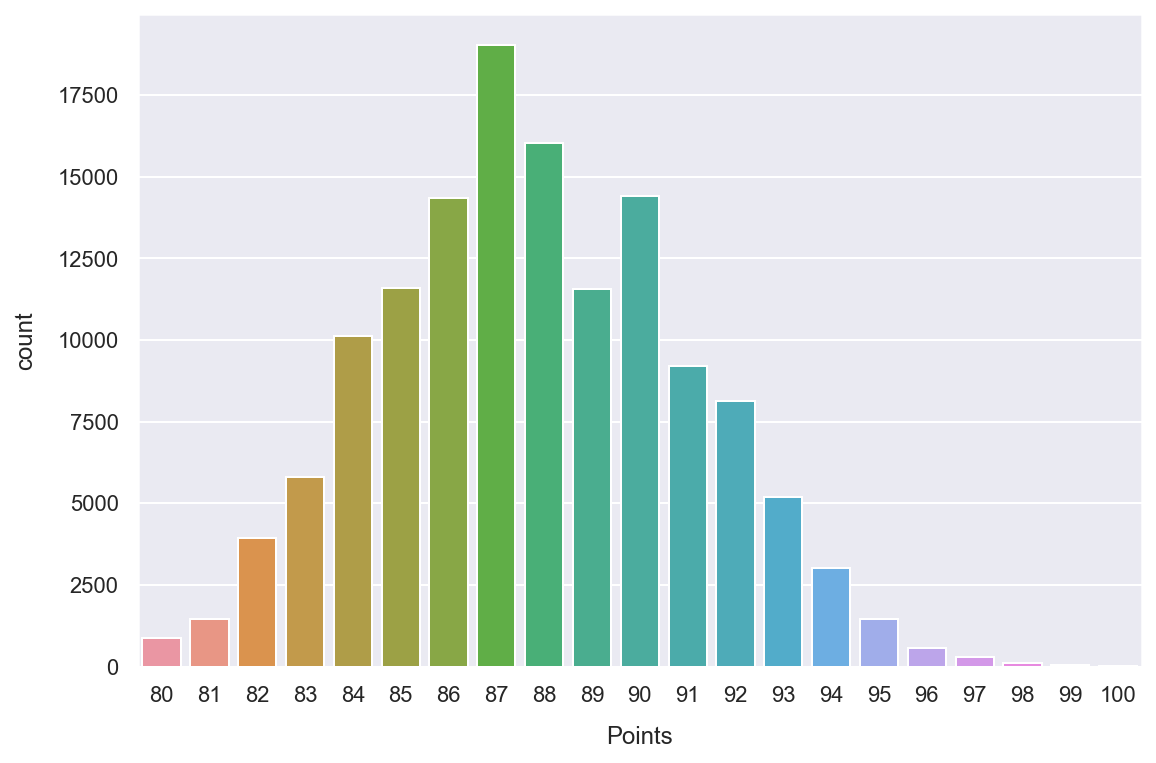

In [62]:
%%time
# Countplot - Distribution of points and how many reviews
sns.countplot(reviews_df['Points'])

### Kernel Density Estimation Plot

Wall time: 374 ms


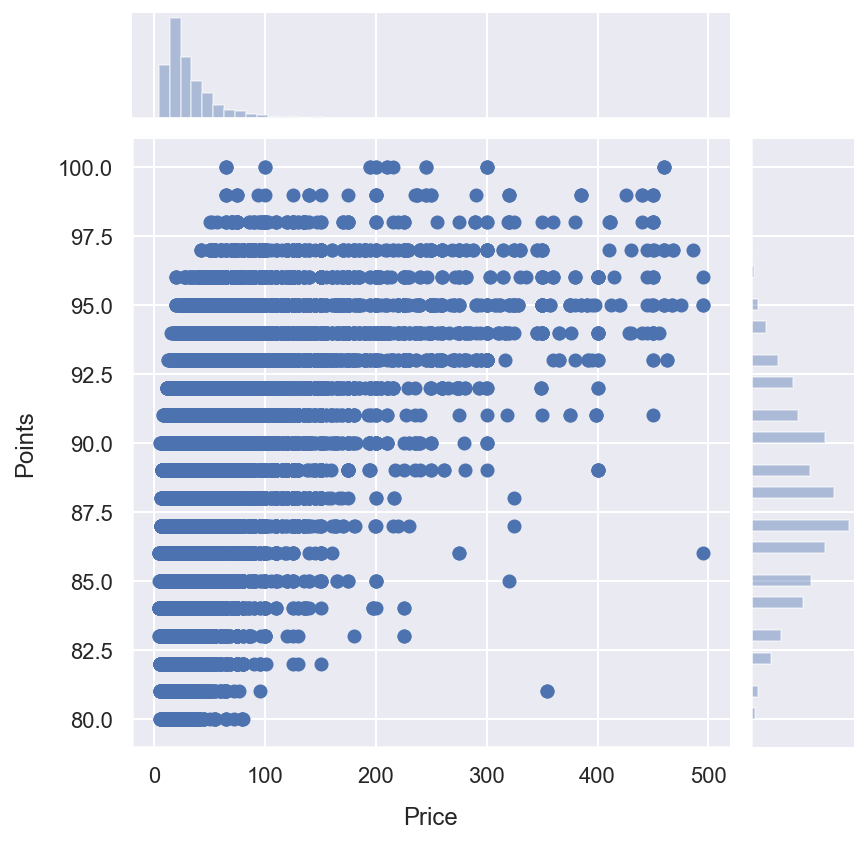

In [63]:
%%time
# Jointplot
sns.jointplot(x='Price', y='Points', data=reviews_df[reviews_df['Price'] < 500])

Wall time: 1.4 s


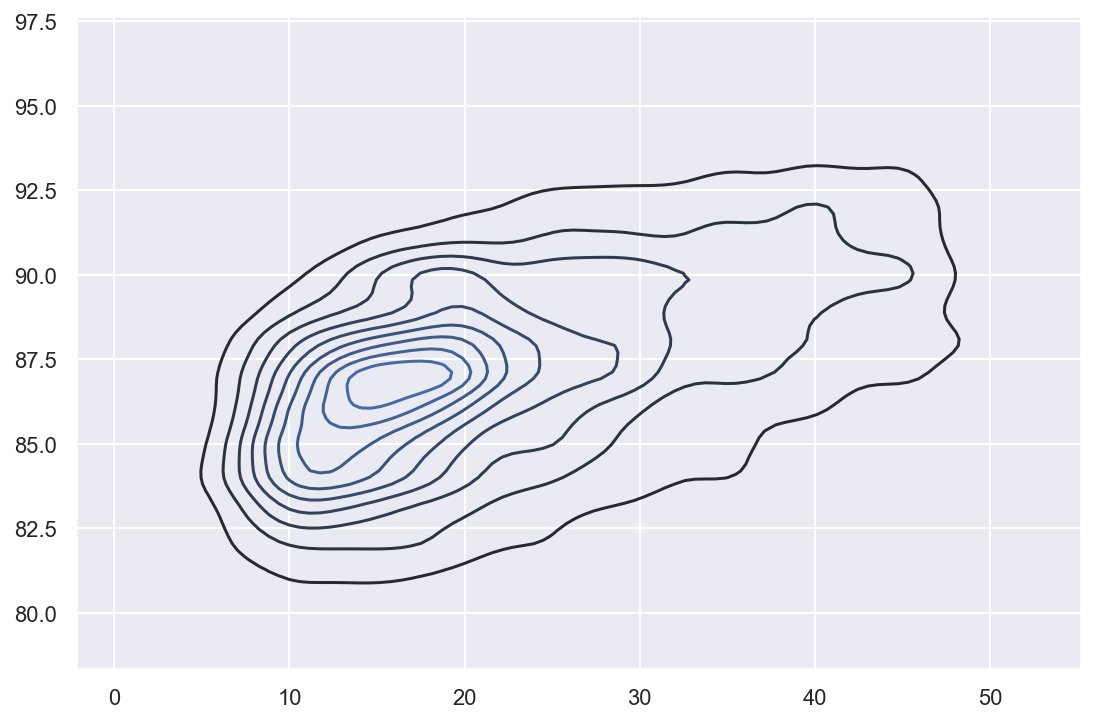

In [64]:
%%time
# Plotted price and point value KDE Chart
sns.kdeplot(reviews_df[reviews_df['Price'] < 50].loc[:, ['Price', 'Points']].dropna().sample(5000))

Wall time: 280 ms


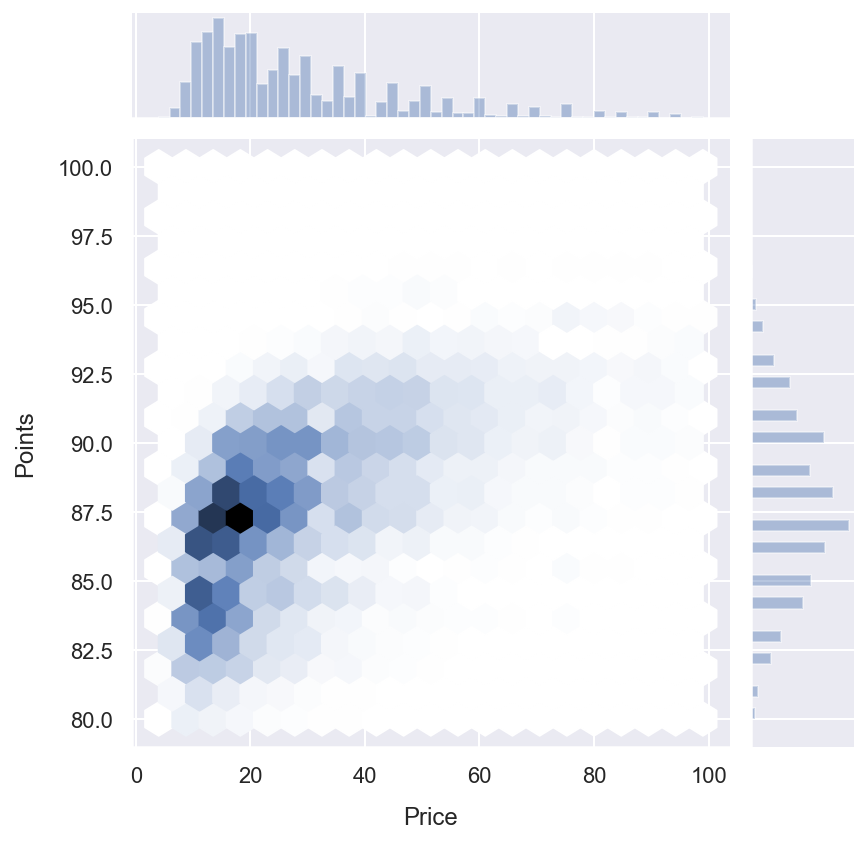

In [65]:
%%time
# Hex grid
sns.jointplot(x='Price', y='Points', data=reviews_df[reviews_df['Price'] < 100], kind='hex', 
              gridsize=20)

Wall time: 251 ms


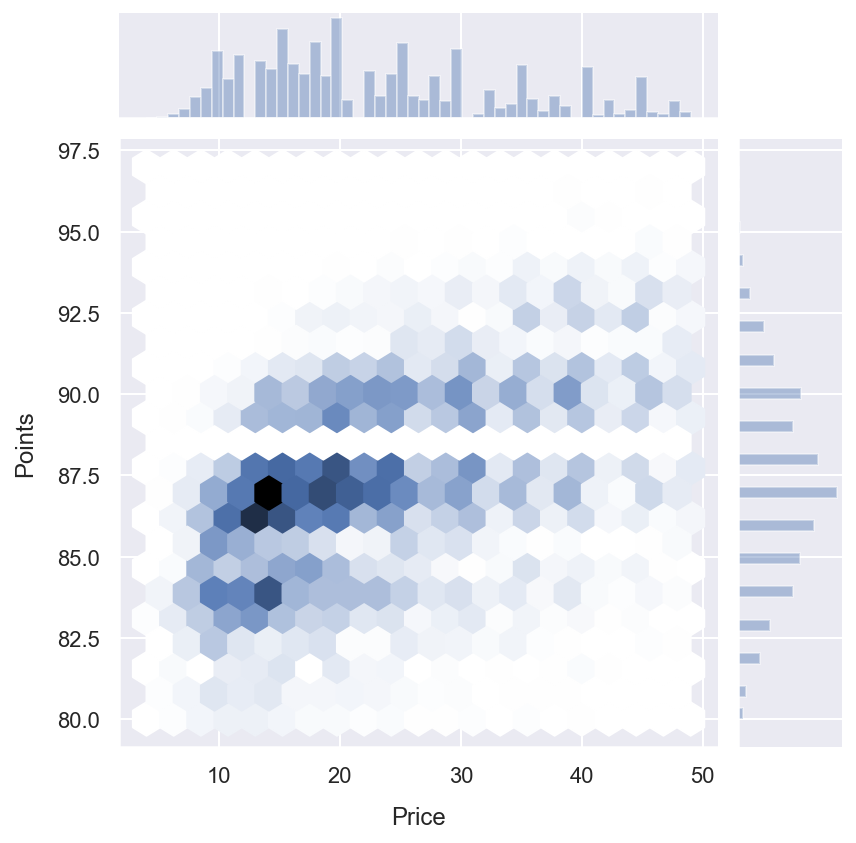

In [66]:
%%time
# Hex grid
sns.jointplot(x='Price', y='Points', data=reviews_df[reviews_df['Price'] < 50], kind='hex', 
              gridsize=20)

### Linear Regression Plot

Wall time: 11.9 s


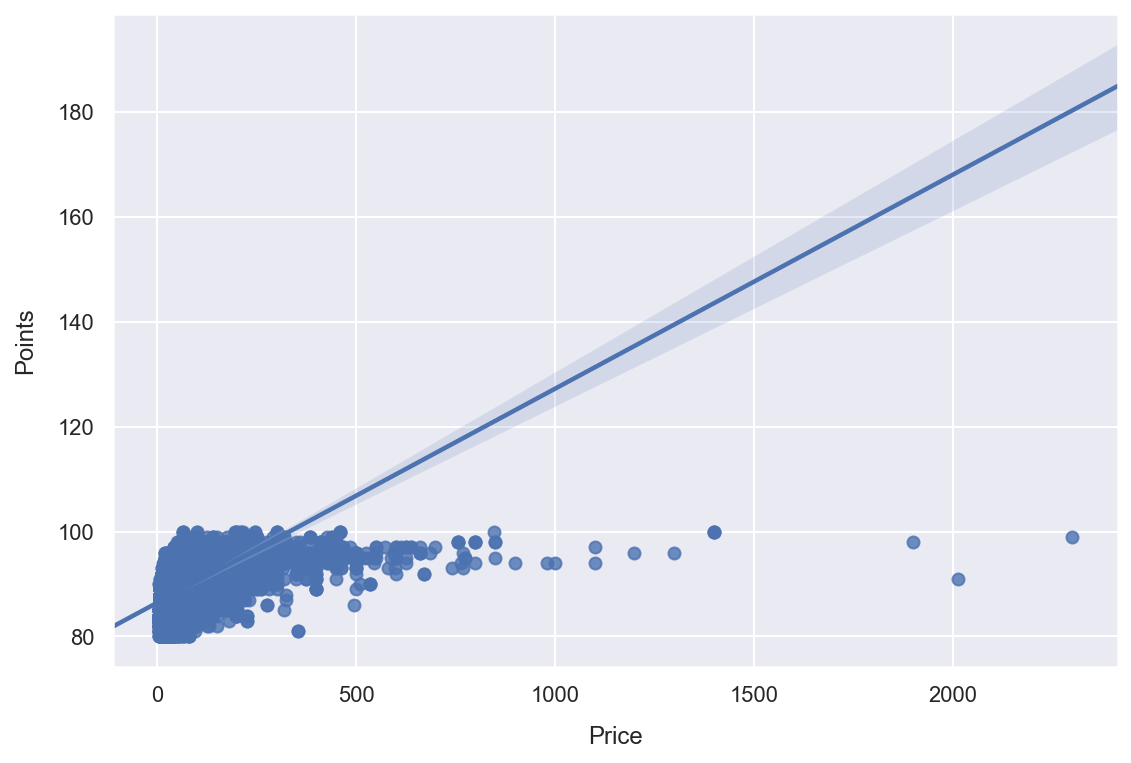

In [67]:
%%time
# Line of best fit (Linear regression)
ax = sns.regplot(x="Price", y="Points", data=reviews_df)

Wall time: 22.8 s


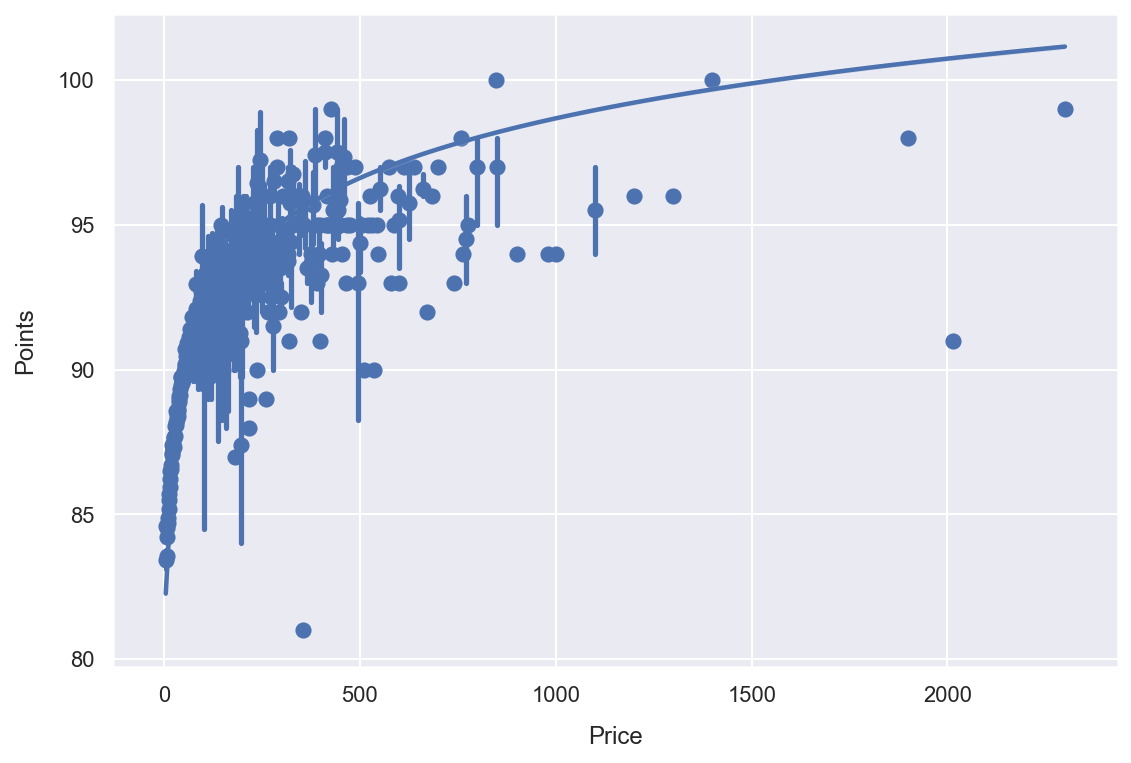

In [68]:
%%time
# Zoomed in Linear Regression
ax = sns.regplot(x=reviews_df["Price"], y="Points", data=reviews_df, x_estimator=np.mean, logx=True, truncate=True)